# 나이브 베이즈 
- 나이브 : 데이터셋의 모든 특징들이 동등하고 독립적이라고 가정한 데에서 모델에 붙여지게 됨 
- 이런 특성은 베이즈 기법을 통해 분류 문제를 풀 수 있게 만들어줌 

In [7]:
import pandas as pd 
import numpy as np 
df = pd.read_csv("./data/sms_spam.csv",encoding="latin_1")
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or Â£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


<AxesSubplot:>

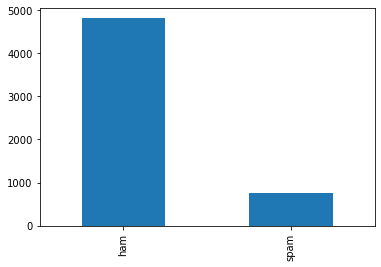

In [8]:
df['type'].value_counts().plot(kind="bar")

In [10]:
from sklearn.model_selection import train_test_split
# 데이터가 정상/ 비정상의 경우 불균형한 것을 확인할 수 있음 이를 train_Test_split에서 비율을 맞춰 학습을 진행하여 확인 
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['type'],test_size=0.2, random_state=30, stratify = df['type'])
print("--------훈련 데이터의 비율-----------")
print(f'정상 메일 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'스팸 메일 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print("--------테스트 데이터의 비율-----------")
print(f'정상 메일 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'스팸 메일 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------훈련 데이터의 비율-----------
정상 메일 = 86.553%
스팸 메일 = 13.447%
--------테스트 데이터의 비율-----------
정상 메일 = 86.601%
스팸 메일 = 13.399%


In [32]:
X_train.shape

(4447,)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(X_train)
print(X_train_dtm.shape)
# 물론 그냥 dtm 만으로도 가능하지만 tf_idf 를 이용하면 성능의 개선을 이룰 수 있음
#tf_idf = TfidfTransformer()
#tfidfv = tf_idf.fit_transform(X_train_dtm)
#print(tfidfv.shape)

(4447, 7664)


In [31]:
X_test

(1112,)

In [35]:
from sklearn.naive_bayes import GaussianNB
# p(xi|y)가 어떤 분포인지를 가정하고 들어가야하기에 이를 기반으로 다양한 나이브 베이즈가 존재함 
mod = GaussianNB()
mod.fit(X_train_dtm.toarray(), y_train)
test_dtm = dtmvector.transform(X_test)

predicted = mod.predict(test_dtm.toarray())
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
# 나이브 베이즈로 90.8%의 정확도를 확인할 수 있었음 
# dtm으로 진행했을 때는 90.9%의 정확도 서로 상관이 없었음 

정확도: 0.9091726618705036


In [37]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,ComplementNB, BernoulliNB, CategoricalNB
accuracy_ = []
for i in [GaussianNB(), MultinomialNB(),ComplementNB(), BernoulliNB()]:
    mod = i 
    mod.fit(X_train_dtm.toarray(), y_train)
    test_dtm = dtmvector.transform(X_test)

    predicted = mod.predict(test_dtm.toarray())
    print("정확도:", accuracy_score(y_test, predicted)) 
    accuracy_.append(accuracy_score(y_test, predicted))

정확도: 0.9091726618705036
정확도: 0.9811151079136691
정확도: 0.9766187050359713
정확도: 0.9712230215827338


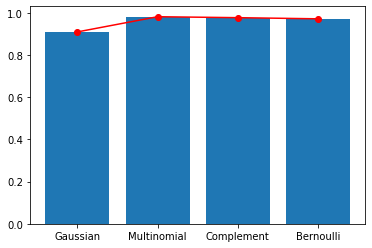

In [48]:
import matplotlib.pyplot as plt 
plt.bar(x = ['Gaussian','Multinomial','Complement','Bernoulli'],height = accuracy_)
plt.plot(accuracy_,'ro-')
plt.show()